In [1]:
#import required library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#read the seperable train data
data = pd.read_csv("train.txt")
data.columns=["X1",'X2',"target"]
data

,X1,X2,target
0,-3.27460,2.44360,1
1,0.50871,0.64457,1
2,0.59212,-1.36930,1
3,2.14320,-2.64960,1
4,-1.40120,0.73143,1
...,...,...,...
1044,10.90600,-7.24040,3
1045,9.95010,-8.12320,3
1046,10.70900,-7.81990,3
1047,8.44400,-9.65170,3


In [3]:
#decribe the data depending on the value of target variable
f=data.groupby("target")
f.describe()

X1                                                             \
        count       mean       std     min       25%       50%       75%   
target                                                                     
1       349.0   0.113476  2.002397 -5.6623 -1.204900   0.19576   1.46230   
2       350.0  10.665218  1.849161  4.1415  9.463500  10.66950  11.97175   
3       350.0  11.247644  1.954466  6.0861  9.917075  11.23700  12.55275   

                    X2                                                     \
            max  count       mean       std      min       25%        50%   
target                                                                      
1        5.0994  349.0  -0.147837  1.487275  -4.2237 -1.255100  -0.082567   
2       15.4920  350.0  10.511364  1.850293   5.2580  9.275625  10.545500   
3       17.6000  350.0  -7.815170  1.955544 -13.2900 -9.152975  -7.846250   

                            
             75%       max  
target                      
1        0.91401   3.75000  
2       11.73925  15.36200  
3       -6.43915  -0.19891

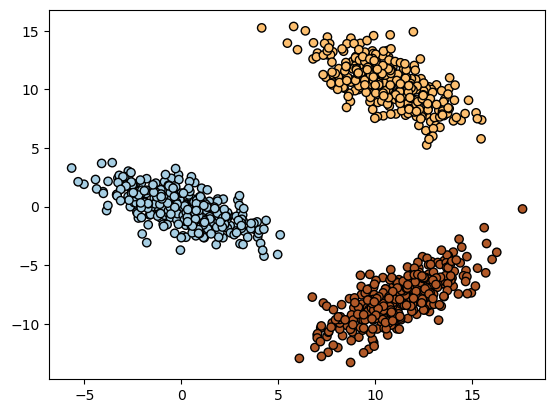

In [4]:
#for visualization draw scatter plot
plt.scatter(data['X1'], data['X2'], c=data['target'], cmap=plt.cm.Paired,marker='o',edgecolors='k')

# Case_2

In [5]:
#find the mean and varience corresponding to each class value
class_labels = [1, 2, 3]
class_priors = [len(data[data['target'] == label]) / len(data) for label in class_labels]
class_means = []
class_covariances = []
for label in class_labels:
    subset = data[data['target'] == label]
    class_means.append(subset[['X1', 'X2']].mean().values)
    class_covariances.append(subset[['X1', 'X2']].cov().values)
print(class_means)
print(class_covariances)


[array([ 0.11347617, -0.14783681]), array([10.665218, 10.511364]), array([11.24764371, -7.81517003])]
[array([[ 4.00959221, -1.97778475],
       [-1.97778475,  2.21198729]]), array([[ 3.4193959 , -2.30650294],
       [-2.30650294,  3.42358592]]), array([[3.81993808, 2.86737734],
       [2.86737734, 3.82415238]])]


In [6]:
#taking the range max and min of both the variable
x_min, x_max = data['X1'].min() , data['X1'].max() 
y_min, y_max = data['X2'].min() , data['X2'].max()
#take the meshgrid for all combination of value
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

In [7]:
#define the classifier using the parameter estimation value draw a region a large number of point
from math import pi, sqrt, exp
def classifier(class_covariances,class_labels=class_labels,class_priors=class_priors,class_means=class_means):
    posterior_probs = []
    #for each class value find mean ,covarience
    for label in class_labels:
        mean = class_means[label - 1]
        covariance = class_covariances[label - 1]
        prior = class_priors[label - 1]

        det_cov = np.linalg.det(covariance)
        inv_cov = np.linalg.inv(covariance)

        x = np.column_stack((xx.ravel(), yy.ravel()))
        #for each class value find posterior
        x_minus_mean = x - mean
        exponent = -0.5 * np.sum((x_minus_mean @ inv_cov) * x_minus_mean, axis=1)
        normalization = 1 / (2 * pi * sqrt(det_cov))
        posterior = normalization * np.exp(exponent) * prior
        #the size of posterioris large so reshape
        posterior = posterior.reshape(xx.shape)
        #adding all probability in the list posterioer_probs
        posterior_probs.append(posterior)
    return(posterior_probs)

In [8]:
#take label value for which class the probability is maximum
predicted_labels = np.argmax(classifier(class_covariances), axis=0) + 1 
print(predicted_labels)

[[3 3 3 ... 3 3 3]
 [3 3 3 ... 3 3 3]
 [3 3 3 ... 3 3 3]
 ...
 [2 2 2 ... 2 2 2]
 [2 2 2 ... 2 2 2]
 [2 2 2 ... 2 2 2]]


In [9]:
#read the test data for prediction
test_data=pd.read_csv("dev.txt")
#Give the column heading
test_data.columns=["X1",'X2',"target"]

In [10]:
test_data

,X1,X2,target
0,-2.70820,1.10250,1
1,-0.14738,-1.57110,1
2,1.49430,-0.59301,1
3,-2.50080,0.94918,1
4,-3.91380,2.58240,1
...,...,...,...
294,12.11500,-6.15260,3
295,10.02000,-10.32700,3
296,16.66200,-4.27170,3
297,8.40180,-9.63800,3


In [11]:
#find the probability corresponding to each class 
#x_test, y_test = np.meshgrid(x_values, y_values)
def prediction_for_test_data(class_covariances,class_labels=class_labels,class_priors=class_priors,class_means=class_means,test_data=test_data):
    x_values = test_data['X1'].values
    y_values = test_data['X2'].values
    posterior_test = []
    for label in class_labels:
        mean = class_means[label - 1]
        covariance = class_covariances[label - 1]
        prior = class_priors[label - 1]
        #calcutate determinant and inverse of the covarience matrix
        det_cov = np.linalg.det(covariance)
        inv_cov = np.linalg.inv(covariance)
        #only take pair element one from x_value and other from y_values
        x = np.column_stack((x_values.ravel(), y_values.ravel()))
        #calculate the posterior probability
        x_minus_mean = x - mean
        exponent = -0.5 * np.sum((x_minus_mean @ inv_cov) * x_minus_mean, axis=1)
        normalization = 1 / (2 * pi * sqrt(det_cov))
        posterior = normalization * np.exp(exponent) * prior
        #append in the list for checking which clas posterior is maximum
        posterior_test.append(posterior)
    return posterior_test

In [12]:
#To maintain the label add 1
predicted_labels_test = np.argmax(prediction_for_test_data(class_covariances), axis=0) + 1 
print(predicted_labels_test)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3]


In [13]:
#define the multivariate normal pdf function
def multivariate_normal_pdf(pos, mu, Sigma):
    n = mu.shape[0]
    Sigma_det = np.linalg.det(Sigma)
    Sigma_inv = np.linalg.inv(Sigma)
    N = np.sqrt((2*np.pi)**n * Sigma_det)
    fac = np.einsum('...k,kl,...l->...', pos-mu, Sigma_inv, pos-mu)

    return np.exp(-fac / 2) / N

In [14]:
#function for ploting the contour
def contour_plot(data):
    class_1_data = data[data["target"] == 1][["X1", "X2"]]
    class_2_data = data[data["target"] == 2][["X1", "X2"]]
    class_3_data = data[data["target"] == 3][["X1", "X2"]]
    x = np.linspace(data["X1"].min(), data["X1"].max(), 100)
    y = np.linspace(data["X2"].min(), data["X2"].max(), 100)
    X, Y = np.meshgrid(x, y)
    pos = np.dstack((X, Y))
    #calcute mean and varience corresponding to each class
    C_1_means = class_1_data.mean().values
    C_1_cov = class_1_data.cov().values
    C_2_means = class_2_data.mean().values
    C_2_cov = class_2_data.cov().values
    C_3_means = class_3_data.mean().values
    C_3_cov = class_3_data.cov().values
    # Calculate PDF for each class
    #give the pdf function value for each point of pos
    Z_1 = multivariate_normal_pdf(pos,C_1_means,C_1_cov)
    Z_2 = multivariate_normal_pdf(pos,C_2_means,C_2_cov)
    Z_3 = multivariate_normal_pdf(pos,C_3_means,C_3_cov)
    return X,Y,Z_1,Z_2,Z_3

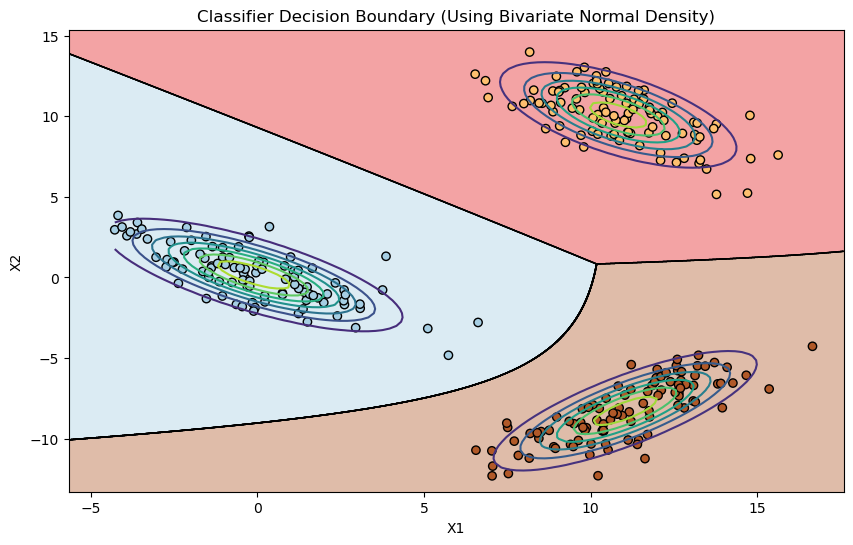

In [15]:
from matplotlib import cm
#drawing the classifier and the test data scatter plot and the test data contour
def classufier_graph(class_covariances):
    predicted_labels = np.argmax(classifier(class_covariances), axis=0) + 1 
    predicted_labels_test = np.argmax(prediction_for_test_data(class_covariances), axis=0) + 1 
    #values=functionn(test_data["X1"], test_data['X2'],test_data["target"],class_covariances)
    fig=plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, predicted_labels, alpha=0.4, cmap=plt.cm.Paired)
    (X,Y,Z_1,Z_2,Z_3)=contour_plot(test_data)
    #for contour ploting
    plt.contour(X, Y, Z_1)
    plt.contour(X, Y, Z_2)
    plt.contour(X, Y, Z_3)
    plt.contour(xx, yy, predicted_labels, colors='k', linewidths=1)  # Contour lines
    plt.scatter(test_data["X1"], test_data['X2'], c=predicted_labels_test, cmap=plt.cm.Paired, marker='o', edgecolors='k')  # Change color and marker
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title('Classifier Decision Boundary (Using Bivariate Normal Density)')
    plt.show()
classufier_graph(class_covariances)

In [16]:
#for compairing we define a dataframe
df = pd.DataFrame({"prediction" :predicted_labels_test , "exact" :test_data['target']})
df=df.reset_index()
df

,index,prediction,exact
0,0,1,1
1,1,1,1
2,2,1,1
3,3,1,1
4,4,1,1
...,...,...,...
294,294,3,3
295,295,3,3
296,296,3,3
297,297,3,3


In [17]:
#count the result i,e exact and prediction
counts=df.groupby(['prediction','exact']).size()
counts

prediction  exact
1           1         99
2           2        100
3           3        100
dtype: int64

In [18]:
#calculate the accuracy
accuracy = np.mean( predicted_labels_test== test_data['target'])
print("Test accuracy:", accuracy)

Test accuracy: 1.0


# Case-1

In [19]:
#calculate the covarience of each class
cov2=np.array(data[data["target"]==1].iloc[:,0:2].cov())
cov3=np.array(data[data["target"]==2].iloc[:,0:2].cov())
cov4=np.array(data[data["target"]==3].iloc[:,0:2].cov())
print(cov2)
print(cov3)
print(cov4)

[[ 4.00959221 -1.97778475]
 [-1.97778475  2.21198729]]
[[ 3.4193959  -2.30650294]
 [-2.30650294  3.42358592]]
[[3.81993808 2.86737734]
 [2.86737734 3.82415238]]


In [20]:
#taking the weighted average of the covarience
cov=(349*cov2+350*cov3+350*cov4)/1049
print(cov)
covariances1=[cov,cov,cov]
covariances1

[[ 3.74939426 -0.47086829]
 [-0.47086829  3.15413915]]


[array([[ 3.74939426, -0.47086829],
        [-0.47086829,  3.15413915]]),
 array([[ 3.74939426, -0.47086829],
        [-0.47086829,  3.15413915]]),
 array([[ 3.74939426, -0.47086829],
        [-0.47086829,  3.15413915]])]

In [21]:
#maintain the class label add up by 1
predicted_labels = np.argmax(classifier(covariances1), axis=0) + 1 
print(predicted_labels)

[[1 1 1 ... 3 3 3]
 [1 1 1 ... 3 3 3]
 [1 1 1 ... 3 3 3]
 ...
 [2 2 2 ... 2 2 2]
 [2 2 2 ... 2 2 2]
 [2 2 2 ... 2 2 2]]


In [22]:
#predicting for test data
predicted_labels_test = np.argmax(prediction_for_test_data(covariances1), axis=0) + 1 
print(predicted_labels_test)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3]


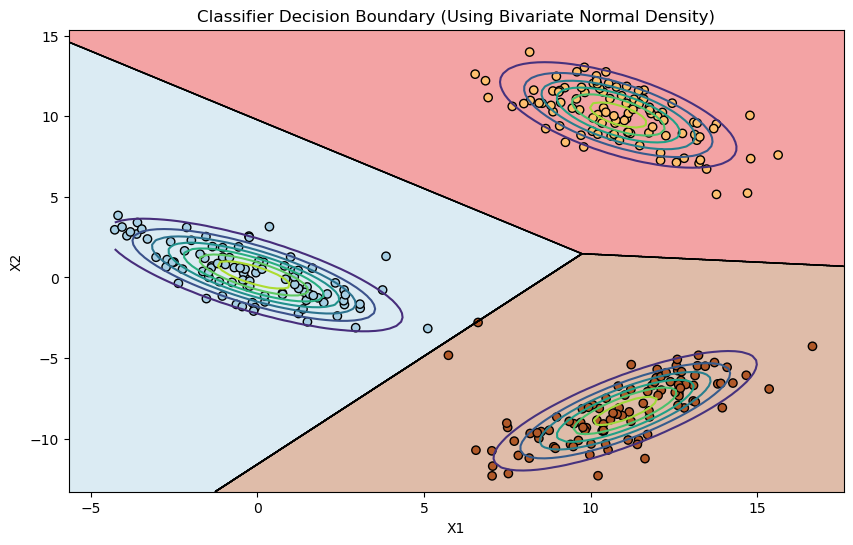

In [23]:
classufier_graph(covariances1)

In [24]:
#crate a dataframe for visualizing the predited value and exact value
df = pd.DataFrame({"prediction" :predicted_labels_test , "exact" :test_data['target']})
df=df.reset_index()
df

,index,prediction,exact
0,0,1,1
1,1,1,1
2,2,1,1
3,3,1,1
4,4,1,1
...,...,...,...
294,294,3,3
295,295,3,3
296,296,3,3
297,297,3,3


In [25]:
#count the carrect classification and missclassification
counts=df.groupby(['prediction','exact']).size()
counts

prediction  exact
1           1         97
2           2        100
3           1          2
            3        100
dtype: int64

In [26]:
#calculate the accuracy with respect to 1
accuracy = np.mean( predicted_labels_test== test_data['target'])
print("Test accuracy:", accuracy)

Test accuracy: 0.9933110367892977


# Case-3 Naive Bayes

In [27]:
#calculate the sigma value for each class distribution by MLE estimation formula
x=data[data["target"]==1]["X1"]
y=data[data["target"]==1]["X2"]
data1 = np.column_stack((x, y))
mu = np.mean(data1, axis=0)
sum_squared_distances = np.sum(np.square(data1- mu))
result1= sum_squared_distances / (2 * len(data1))
print(result1)


3.1018763097203053


In [28]:
x=data[data["target"]==2]["X1"]
y=data[data["target"]==2]["X2"]
data1 = np.column_stack((x, y))
mu = np.mean(data1, axis=0)
sum_squared_distances = np.sum(np.square(data1- mu))
result2= sum_squared_distances / (2 * len(data1))
print(result2)


3.411715222318571


In [29]:
x=data[data["target"]==3]["X1"]
y=data[data["target"]==3]["X2"]
data1 = np.column_stack((x, y))
mu = np.mean(data1, axis=0)
sum_squared_distances = np.sum(np.square(data1- mu))
result3= sum_squared_distances / (2 * len(data1))
print(result3)


3.8111251034726727


In [30]:
#taking the weighted average
sigma=(349*result1+350*result2+350*result3)/1049
sigma

3.44189604015188

In [31]:
#mutliplied with identity element to construct the covarience matrix
v=sigma*np.eye(2)
covariances3=[sigma*v,sigma*v,sigma*v]
covariances3

[array([[11.84664835,  0.        ],
        [ 0.        , 11.84664835]]),
 array([[11.84664835,  0.        ],
        [ 0.        , 11.84664835]]),
 array([[11.84664835,  0.        ],
        [ 0.        , 11.84664835]])]

In [32]:
#for classifier 
predicted_labels = np.argmax(classifier(covariances3), axis=0) + 1 
print(predicted_labels)

[[1 1 1 ... 3 3 3]
 [1 1 1 ... 3 3 3]
 [1 1 1 ... 3 3 3]
 ...
 [1 1 1 ... 2 2 2]
 [1 1 1 ... 2 2 2]
 [1 1 1 ... 2 2 2]]


In [33]:
predicted_labels_test = np.argmax(prediction_for_test_data(covariances3), axis=0) + 1 
print(predicted_labels_test)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3]


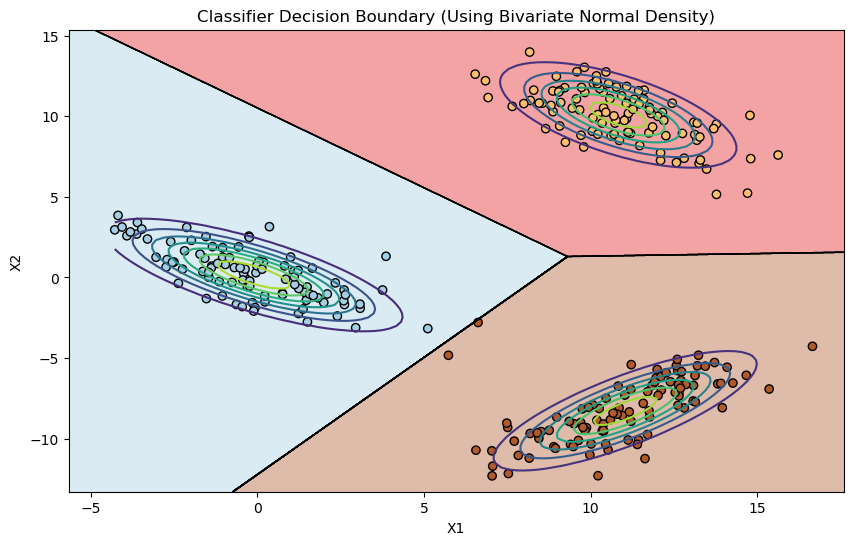

In [34]:
#plot the classifier ,contour and scatter for test data
classufier_graph(covariances3)

In [35]:
#construct a dataframe
df = pd.DataFrame({"prediction" :predicted_labels_test , "exact" :test_data['target']})
df=df.reset_index()
df

,index,prediction,exact
0,0,1,1
1,1,1,1
2,2,1,1
3,3,1,1
4,4,1,1
...,...,...,...
294,294,3,3
295,295,3,3
296,296,3,3
297,297,3,3


In [36]:
#count the correctly classified point and miss classified point
counts=df.groupby(['prediction','exact']).size()
counts

prediction  exact
1           1         97
2           2        100
3           1          2
            3        100
dtype: int64

In [37]:
#caculate accuracy with respect to 1
accuracy = np.mean( predicted_labels_test== test_data['target'])
print("Test accuracy:", accuracy)

Test accuracy: 0.9933110367892977


# Case-4

In [38]:
#covarience matrix of each class each diferent but the features are conditionally independent
v=sigma*np.eye(2)
covariances4=[result1*v,result2*v,result3*v]
covariances4

[array([[10.67633579,  0.        ],
        [ 0.        , 10.67633579]]),
 array([[11.74276911,  0.        ],
        [ 0.        , 11.74276911]]),
 array([[13.1174964,  0.       ],
        [ 0.       , 13.1174964]])]

In [39]:
#predicted value for a train element
predicted_labels = np.argmax(classifier(covariances4), axis=0) + 1 
print(predicted_labels)

[[1 1 1 ... 3 3 3]
 [1 1 1 ... 3 3 3]
 [1 1 1 ... 3 3 3]
 ...
 [2 2 2 ... 2 2 2]
 [2 2 2 ... 2 2 2]
 [2 2 2 ... 2 2 2]]


In [40]:
#prediting the target value for each element of the test data
predicted_labels_test = np.argmax(prediction_for_test_data(covariances4), axis=0) + 1 
print(predicted_labels_test)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3]


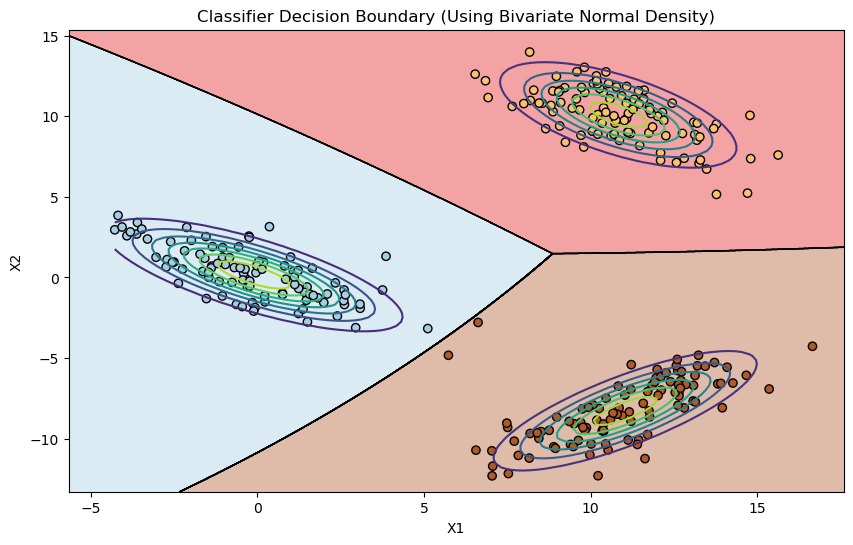

In [41]:
#calling the function for plotting the case 4 criteria
classufier_graph(covariances4)

In [42]:
#define a dataframe for compairing the exact and predited value side by side
df = pd.DataFrame({"prediction" :predicted_labels_test , "exact" :test_data['target']})
df=df.reset_index()
df

,index,prediction,exact
0,0,1,1
1,1,1,1
2,2,1,1
3,3,1,1
4,4,1,1
...,...,...,...
294,294,3,3
295,295,3,3
296,296,3,3
297,297,3,3


In [43]:
#count the result the number of correctly clasified and missclassified
counts=df.groupby(['prediction','exact']).size()
counts

prediction  exact
1           1         97
2           2        100
3           1          2
            3        100
dtype: int64

In [44]:
#calculate accuracy with respect to 1
accuracy = np.mean( predicted_labels_test== test_data['target'])
print("Test accuracy:", accuracy)

Test accuracy: 0.9933110367892977
